In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
import os
import datetime
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input


In [2]:
%pwd

'E:\\GAN for Face expression Classification\\iteration 2\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'E:\\GAN for Face expression Classification\\iteration 2'

In [5]:
train_dir = 'dataset/gan_Balanced_train'
val_dir = 'dataset/Balanced_val'

In [6]:
def create_model(input_shape=(150, 150, 3)):
    inputs = Input(shape=input_shape)
    x = layers.Conv2D(32, (3, 3), activation='relu')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    outputs = layers.Dense(7, activation='softmax')(x)
    model = models.Model(inputs, outputs)
    return model


In [7]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [8]:
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Define your callbacks
log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_callback = callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

In [9]:
# Train the model
batch_size = 128
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True  # Shuffle the data to ensure randomness
)


Found 25185 images belonging to 7 classes.


In [10]:
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # No need to shuffle validation data
)


Found 777 images belonging to 7 classes.


In [11]:
steps_per_epoch = None  # Allow the generator to loop indefinitely
validation_steps = val_generator.samples // batch_size

In [12]:
model = create_model()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=50,
    validation_data=val_generator,
    validation_steps=validation_steps,
    callbacks=[tensorboard_callback, early_stopping_callback]
)

Epoch 1/50


C:\Users\karti\miniconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


197/197 ━━━━━━━━━━━━━━━━━━━━ 164s 812ms/step - accuracy: 0.2648 - loss: 1.7026 - val_accuracy: 0.1979 - val_loss: 2.3938
Epoch 2/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 0s 808ms/step - accuracy: 0.3249 - loss: 1.5529

C:\Users\karti\miniconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


197/197 ━━━━━━━━━━━━━━━━━━━━ 162s 810ms/step - accuracy: 0.3249 - loss: 1.5529 - val_accuracy: 0.5556 - val_loss: 1.7303
Epoch 3/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 161s 806ms/step - accuracy: 0.3316 - loss: 1.5375 - val_accuracy: 0.2240 - val_loss: 2.6588
Epoch 4/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 161s 805ms/step - accuracy: 0.3510 - loss: 1.5189 - val_accuracy: 1.0000 - val_loss: 1.3027
Epoch 5/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 162s 809ms/step - accuracy: 0.3615 - loss: 1.5115 - val_accuracy: 0.2565 - val_loss: 2.5844
Epoch 6/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 162s 808ms/step - accuracy: 0.3752 - loss: 1.4811 - val_accuracy: 1.0000 - val_loss: 0.7459
Epoch 7/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 163s 814ms/step - accuracy: 0.3998 - loss: 1.4425 - val_accuracy: 0.3242 - val_loss: 2.8111
Epoch 8/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 162s 808ms/step - accuracy: 0.4229 - loss: 1.4053 - val_accuracy: 0.6667 - val_loss: 0.8607
Epoch 9/50
197/197 ━━━━━━━━━━━━━━━━━━━━ 162s 811ms/step - accuracy: 0.4396 - loss: 1.37

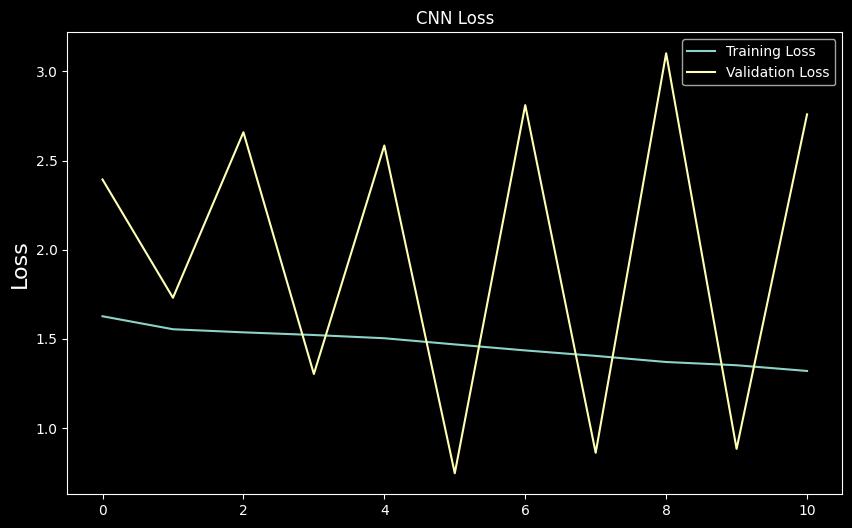

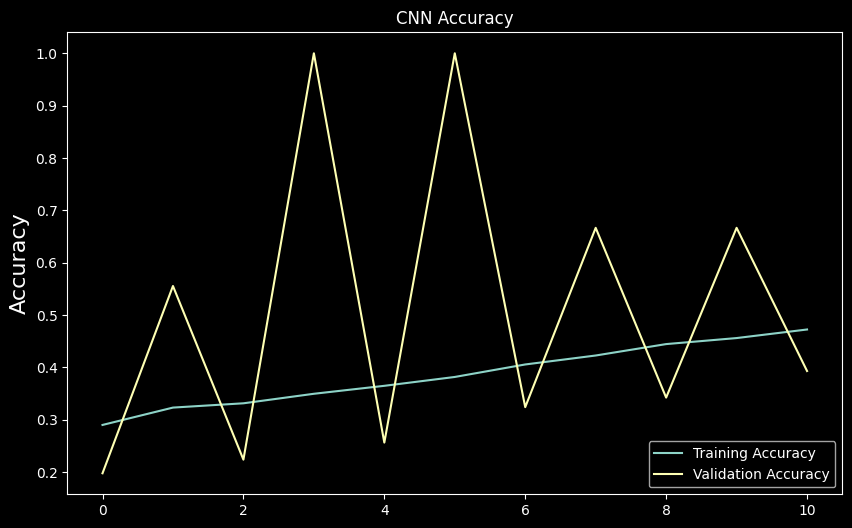

In [16]:
import logging
from pathlib import Path
logging.basicConfig(
    # filename='extract_data.log',
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S'
)
import matplotlib.pyplot as plt


# Save plots
plots_path = Path(os.getcwd()) / "model" / "cnn"
plt.style.use('dark_background')

# Loss plot
plt.figure(figsize=(10, 6))
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('CNN Loss')
plt.savefig(plots_path / "CNN_Loss.png")
plt.show()

# Accuracy plot
plt.figure(figsize=(10, 6))
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('CNN Accuracy')
plt.savefig(plots_path / "CNN_Accuracy.png")
plt.show()
